# COGS 108 - Final Project 

# Overview

The background of the  Spotify Tracks Database contains the songs related features including genre, artist, track, id, popularity and  so on. Each song in the Spotify database has a unique ID. We can apply the features such as genre and popularity to predict the popularity of a song based on its genre, and we can predict how is the popularity of a song being related to the singer. We can even combine multiple characteristics of a song to predict whether a song with certain crucial features will be most likely to be popular in the features. 
The database we chose is newly updated in 2019 March, so very few online projects applied this database yet, but we can find some other Spotify database in previous years and applied the ideas from those database related projects.

 This data is extremely useful for artists or producers that are looking to create the next “hit” song.  By utilizing the given data, they can possibly predict what the next “hit” song will be by analyzing the data of song features and determining if there is a correlation.  We can apply the features such as genre and popularity to predict the popularity of a song based on its genre, and we can predict how is the popularity of a song being related to the artist. We can even combine multiple features of a song to predict whether a song with certain crucial features will be most likely to be popular in the features. We want to discover the specific song features that all top charting songs share, if there are any.  We will look at specifically chosen song features to see if there is a correlation between songs sharing similar features that are in the top charts.  If our hypothesis is correct, it will show that songs in music top charts share similar song features.  Thus, this will lead us to be able to predict the next “hit” song. 




# Names

-Yu Shen: set up, Data Cleaning, Target classification, Model Training, Data Analysis & Results

-Zhaokai Xu: set up, Data Cleaning, model training, Data Analysis & Results，Visualization 

-Iris Peng: 

-Anthony Martinez: 

-Jingwen Chen: 


# Group Members IDs

- A13496628
- A14738474
- A13696093
- A14774741
- A13378551

# Research Question


Output target: song_popularity 

Q1. Do popular songs have similar attributes? If so, what are these attributes? Specifically, out of a chosen 13 attributes (song duration, tempo, key, etc.), are there similarities between them that determine a song’s popularity? 

Q2. Furthermore, after identifying these attributes, can we use them to predict which song will be most popular next? 	



## Background and Prior Work

Music is a huge component of the history and culture of mankind.  More recently, music has evolved into a business.  Artists are constantly competing for the top spots on music charts.  Whether it is for top song or top album.  Being highly ranked in these charts is important for artists because it will lead to more endorsements, more recognition, and most importantly, more record and song sales.  Now, creating a song that makes it on the top charts doesn’t necessarily mean that it was composed by Mozart.  Most popular songs have a familiar sound.  Upbeat, fast, and loud are good indicators of what could possibly be a popular song.  Creating a popular song doesn’t necessarily mean that you will make it on the top charts, but it does give you a better chance at it.  Now, streaming is the future of music.Streaming services like Apple Music and Spotify are releasing very useful data on current music.  More specifically, Spotify releases data on the song features for each song.  There are 13 total song features that Spotify releases to the public including: tempo, time signature, loudness, danceability, and more. 

In other Spotify related projects such as, https://www.kaggle.com/nadintamer/top-tracks-of-2017  
It raises interesting questions to explore the dataset such as 
Looking for patterns in the audio features of the songs. Why do people stream these songs the most?
How can we predict one audio feature based on the others features 
Explore which features correlate the most
https://www.kaggle.com/edumucelli/spotifys-worldwide-daily-song-ranking
Can you predict what is the rank position or the number of streams a song will have in the future?
What are the signs of a song that gets into the top rank to stay?
Do continents share same top ranking artists or songs?
Are people listening to the very same top ranking songs on countries far away from each other?
Other projects builders mostly applied machine learning regression models and classification models to make predictions, and the most popular library they referred to is Sklearn. They realized that the data preprocessing is crucial to the success of the projects, and feeding balanced data into the model they applied greatly contributes to improve the accurate prediction.These are the things we can be careful about while working on our project.
Since the dataset we are using contains different features compared to the other Spotify dataset, we suggest to try to take the best advantage of our unique features and raise some interesting exploration.
References (include links):
- 1) https://www.kaggle.com/nadintamer/top-tracks-of-2017  
- 2) https://www.kaggle.com/edumucelli/spotifys-worldwide-daily-song-ranking

# Hypothesis


Among the 14 features we have, 'song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature', 'audio_valence', u'playlist, we want to analyze what feature would contribute the most to the popularity of a song. 

Intuitively, we will make the hypothesis that dancebility, livenesss, tempo and energy are key factors of a song_popularity

# Dataset(s)

- Dataset Name:19000 Spotify Songs 
- Link to the dataset: https://www.kaggle.com/edalrami/19000-spotify-songs

- Number of observations:19000

This dataset uses Spotify API and contains data of 19000 songs. It has 15 features, including ：song_name, song_popularity,song_duration_ms, acousticness, danceability, energy, instrumentalness, key, liveness, loudness, audio_mode, speechiness, tempo, time_signature, audio_valence.  It has a relatively large amount of samples which is the main reason we chose this dataset. All these audio features come from Spotify API and the data set is updated 5 months ago.

# Setup and data pre-analyzing

In [1]:
%matplotlib inline

#TODO: NEED Explanation 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest, norm
import seaborn as sns;

from sklearn.model_selection import train_test_split  
from sklearn.utils import shuffle


/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# 1.1 read data 

song_data_df = pd.read_csv("song_data.csv")

song_info_df = pd.read_csv("song_info.csv")

In [3]:
# 1.2 preview data
song_data_df.head(5)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [4]:
song_info_df.head(5)

,song_name,artist_name,album_names,playlist
0,Boulevard of Broken Dreams,Green Day,Greatest Hits: God's Favorite Band,00s Rock Anthems
1,In The End,Linkin Park,Hybrid Theory,00s Rock Anthems
2,Seven Nation Army,The White Stripes,Elephant,00s Rock Anthems
3,By The Way,Red Hot Chili Peppers,By The Way (Deluxe Version),00s Rock Anthems
4,How You Remind Me,Nickelback,Silver Side Up,00s Rock Anthems


In [5]:
song_data_df = song_data_df.set_index('song_name')
song_info_df = song_info_df.set_index('song_name')

The reason we set the song_name as the index is: 
1. we do not want to treat it as a feature; 
2. using it as index allow us to combine two dataframe by index. 

In [6]:
song_data_df.shape

(18835, 14)

In [7]:
song_info_df.shape

(18835, 3)

In [8]:
# 1.3 combine the two dataset into df
df = pd.concat([song_data_df, song_info_df], axis=1)
df.shape

(18835, 17)

In [9]:
df.head(5)

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,artist_name,album_names,playlist
song_name,,,,,,,,,,,,,,,,,
Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474,Green Day,Greatest Hits: God's Favorite Band,00s Rock Anthems
In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370,Linkin Park,Hybrid Theory,00s Rock Anthems
Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324,The White Stripes,Elephant,00s Rock Anthems
By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198,Red Hot Chili Peppers,By The Way (Deluxe Version),00s Rock Anthems
How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574,Nickelback,Silver Side Up,00s Rock Anthems


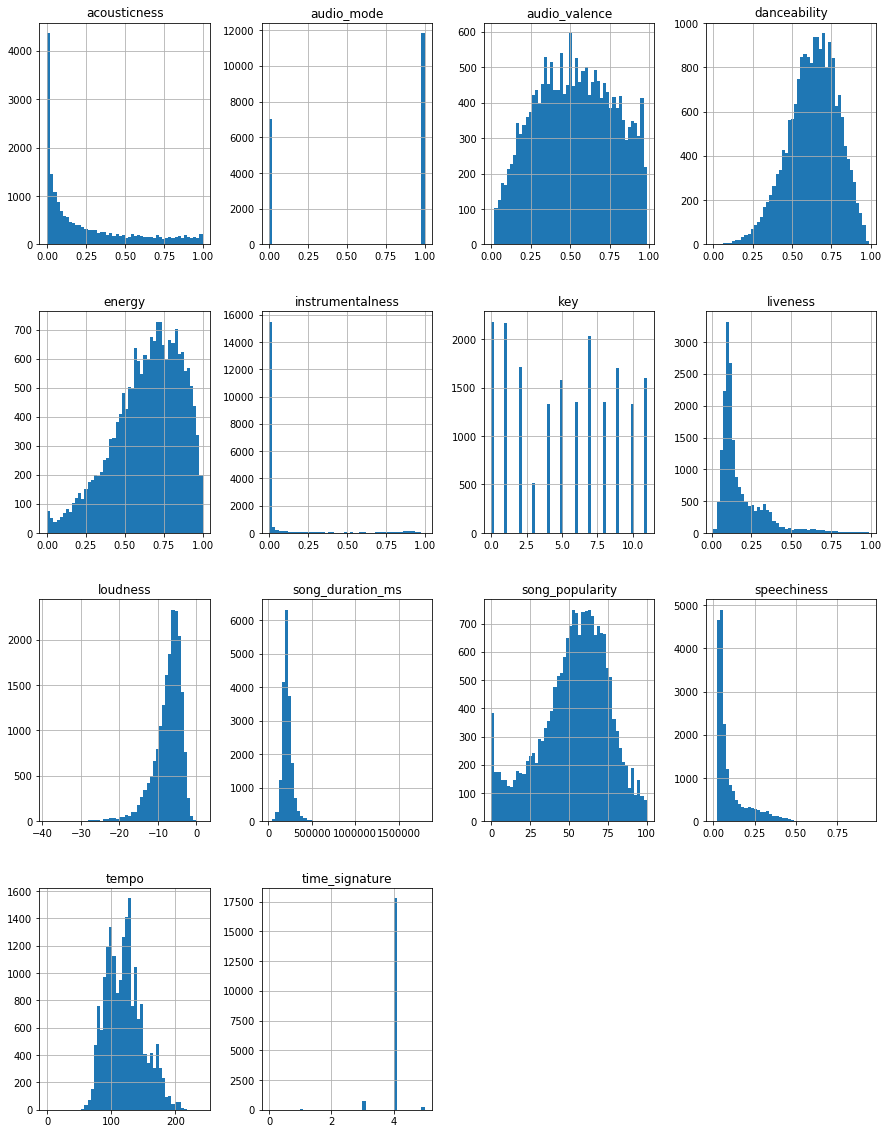

In [10]:
# 1.4 print distribution alongside all features
hist = df.hist(bins = 50,figsize = (15,20))

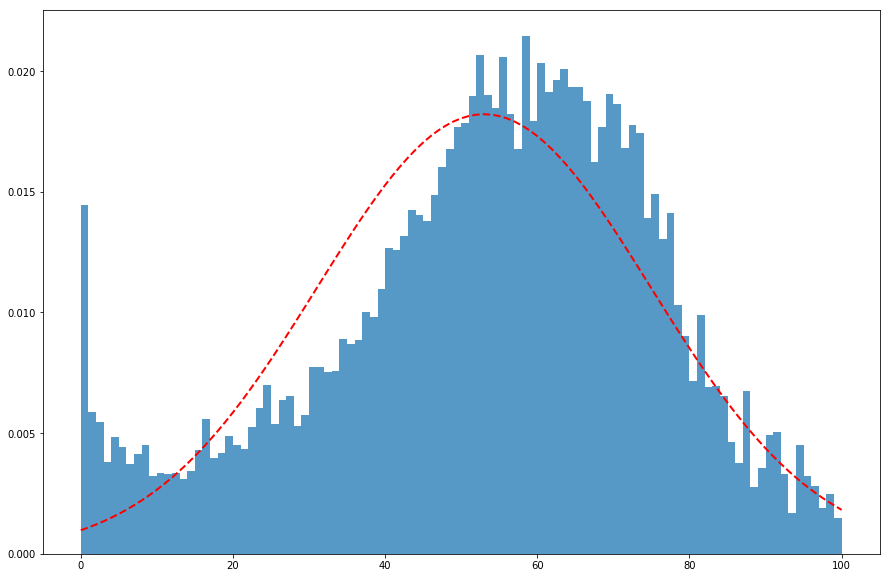

In [11]:
song_popularity = df['song_popularity'].tolist()
# find stats of song__popularity: mean and standard deviation
mu, sd = norm.fit(song_popularity)

#draw the histogram of the target
plt.subplots(figsize=(15,10))
n, bins, patches = plt.hist(song_popularity, bins = 100,density = 1,alpha = 0.75)

#draw the distribution function curve 
y =stats.norm.pdf( bins, mu, sd)
curve = plt.plot(bins, y, 'r--', linewidth=2)
plt.show()

#TODO Analyze the distribution here. 


# Data Cleaning

Describe your data cleaning steps here.

### 2.1 drop potential useless features: 

In [12]:
df = df.drop(['album_names'], axis=1)
df = df.drop(['artist_name'], axis=1)

We drop these two features because they all have unique values, which cannot be treated as a meaning feature. Therefore we dropped them. 

### 2.2 one hot encoding the playlist

In [13]:
newdf = pd.get_dummies(df,prefix=['playlist'])

In [14]:
newdf.head(5)

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,...,playlist_Weekend Hangouts,playlist_Wild Cards_ Winter Mix,playlist_Women of Pop,playlist_Workday_ Pop,playlist_Workout Groove,playlist_Workout Twerkout,playlist_You & Me,playlist_Young & Free,playlist_Your Favorite Coffeehouse,playlist_mint
song_name,,,,,,,,,,,,,,,,,,,,,
Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,...,0,0,0,0,0,0,0,0,0,0
In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,...,0,0,0,0,0,0,0,0,0,0
Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,...,0,0,0,0,0,0,0,0,0,0
By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,...,0,0,0,0,0,0,0,0,0,0
How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,...,0,0,0,0,0,0,0,0,0,0


After one-hot encoding, we have 313 features, 300 of which are one-hot encoded of different playlists, since we have 300 different playlists in the dataset. 

### 2.3 analyze data relevance 

In [15]:
len(df['playlist'].unique())

300

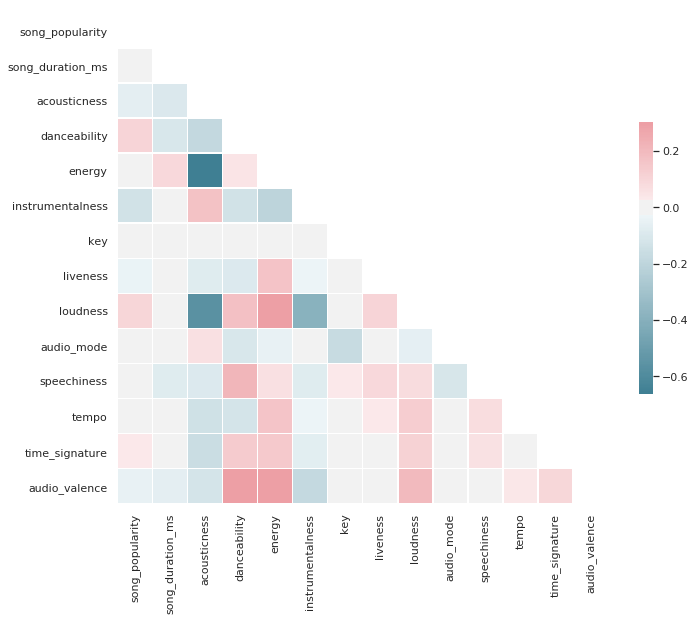

In [16]:
# analyze correlation 
# in range [-1,1], -1 means negtively correlated, 1 means positively correlated,0 means no relation

# analyze the correlation corresponding to popularity 


sns.set(style="white")

# Generate a large random dataset
# rs = np.random.RandomState(33)
d = pd.DataFrame(data=df,columns=list(df.columns))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


#TODO: Analysis here

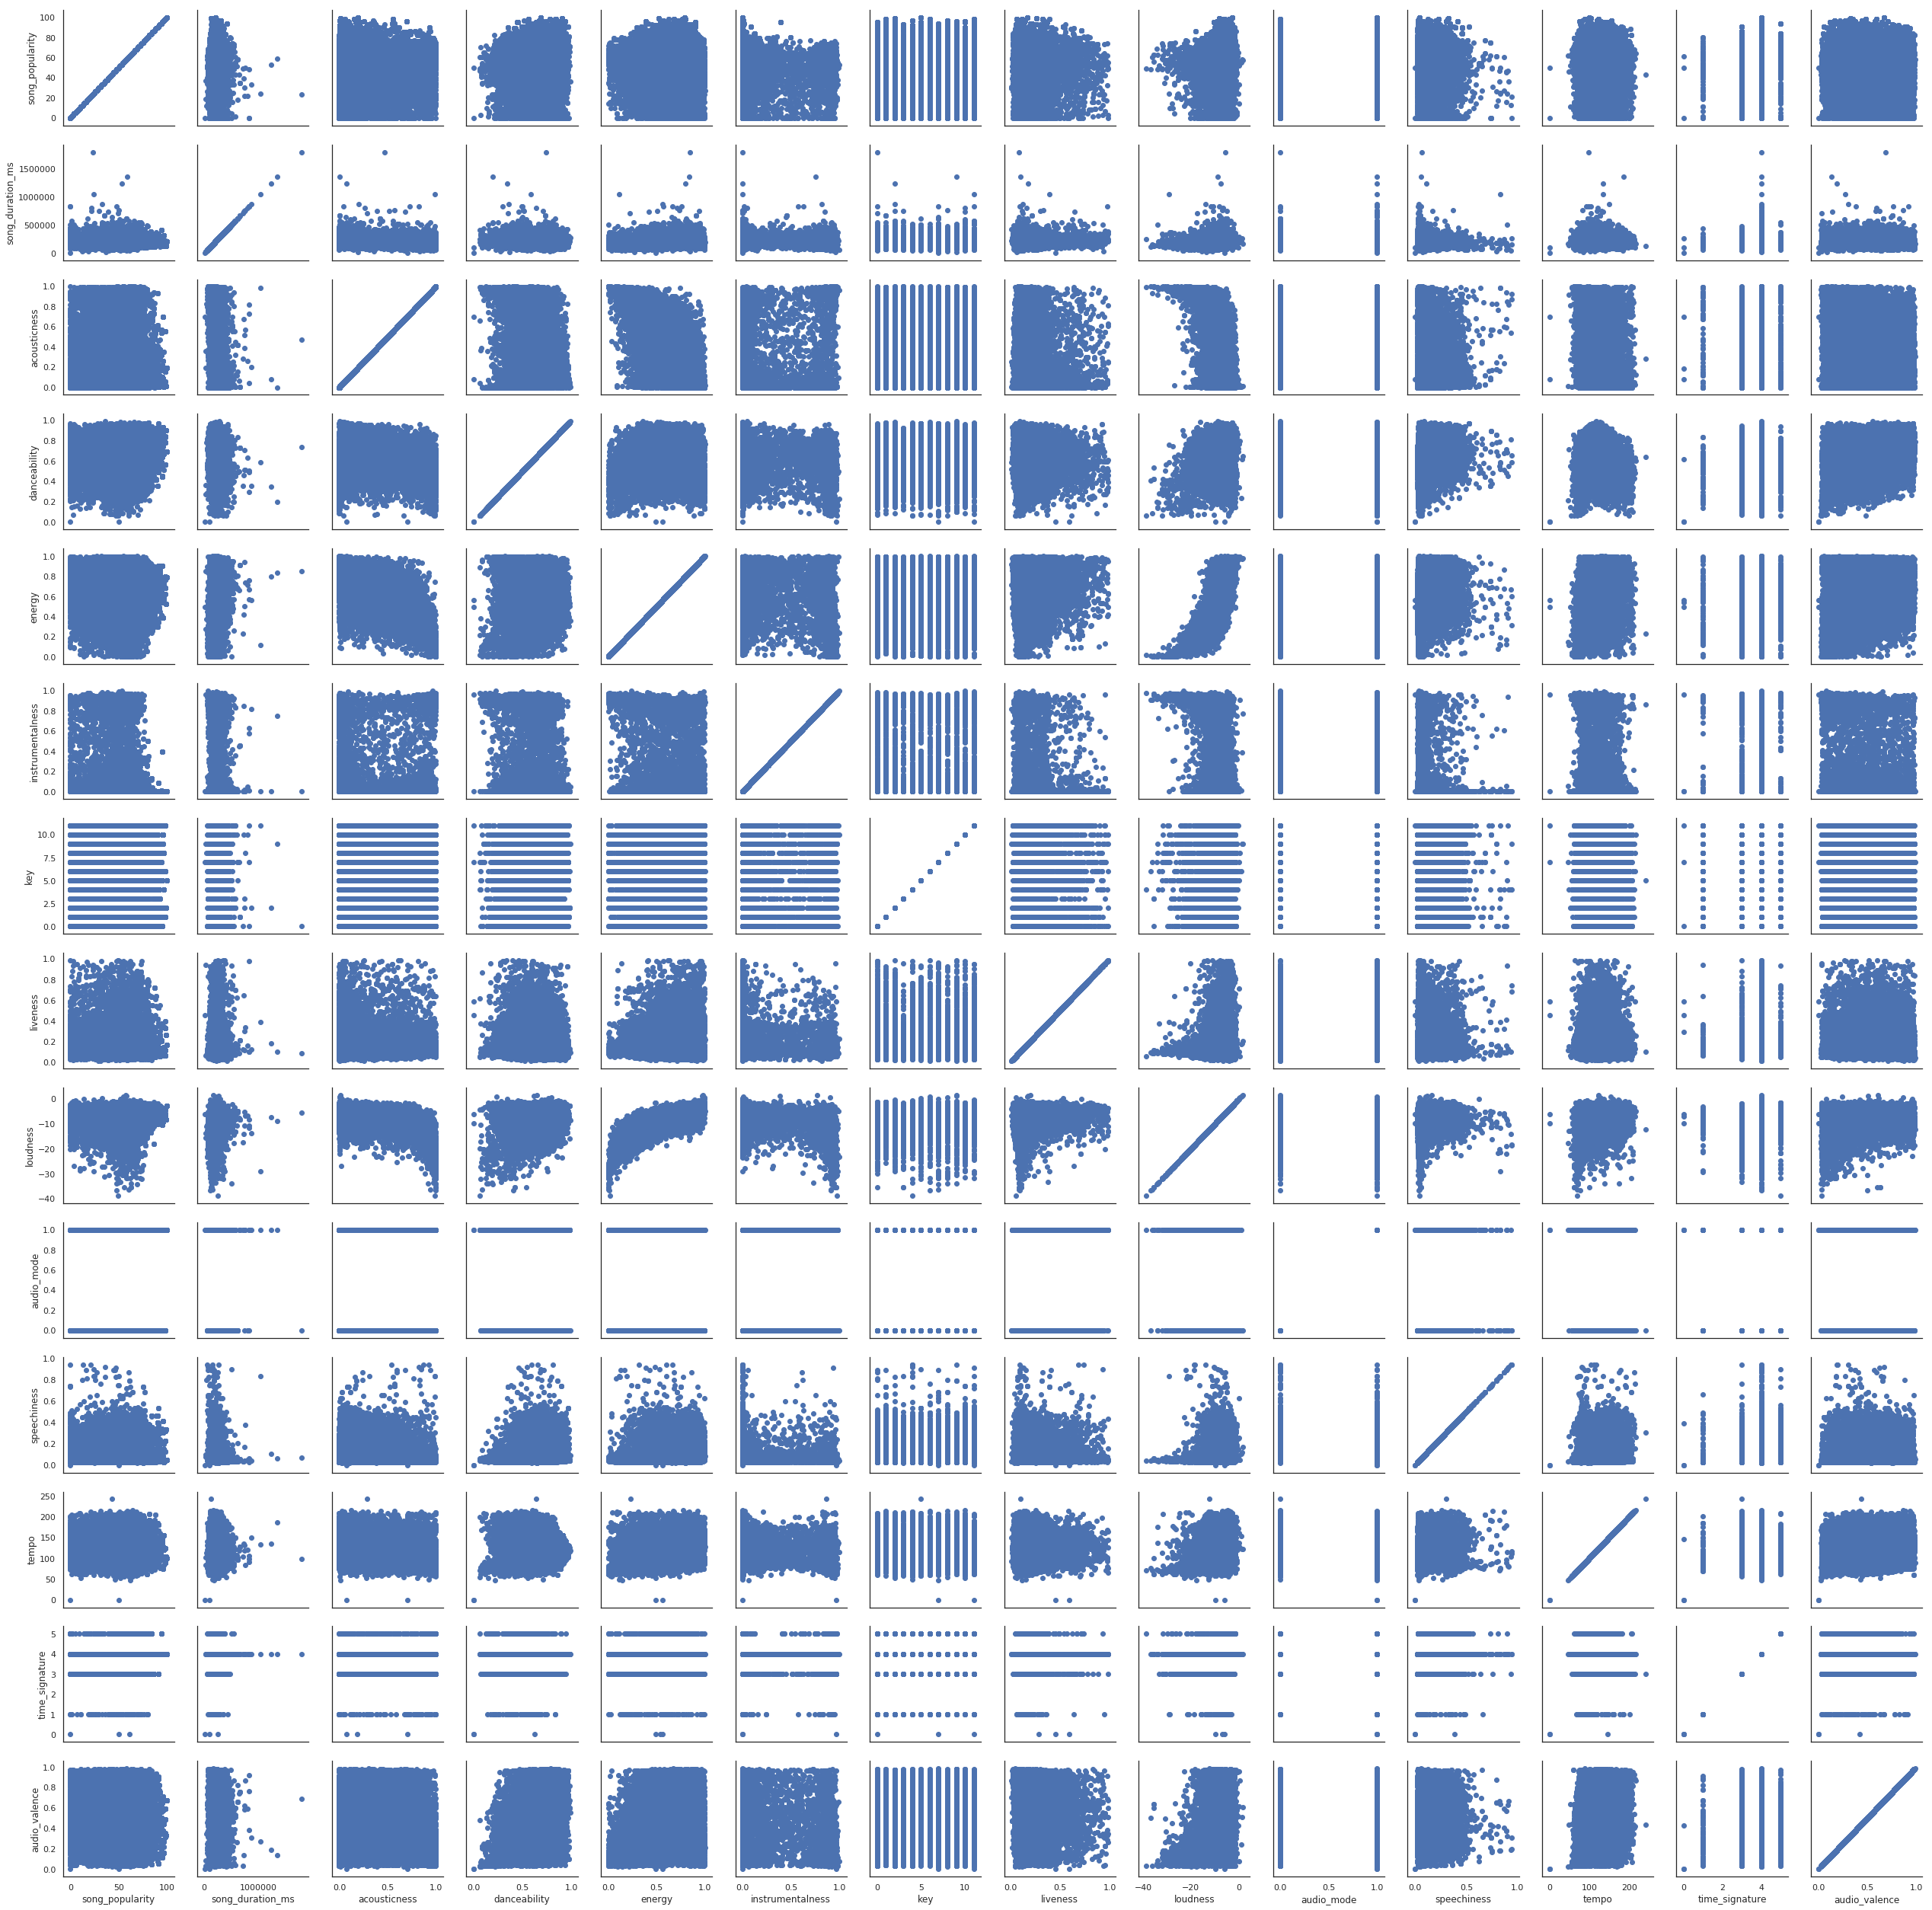

In [17]:
# This class maps each variable in a dataset onto a column and row in a grid of multiple axes. 
# Different axes-level plotting functions can be used to draw bivariate plots in the upper and lower triangles, 
# and the the marginal distribution of each variable can be shown on the diagonal.
g = sns.PairGrid(df)
g = g.map(plt.scatter)

#TODO: Analysis here

In [18]:
# print the corr matrix for later filtering use
corr = df.corr()
corr.style.background_gradient()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
song_popularity,1,-0.0188994,-0.0651811,0.10429,0.00136508,-0.130907,-0.0131604,-0.0389366,0.0994422,-0.00496934,0.0214794,-0.0226721,0.0349832,-0.0528953
song_duration_ms,-0.0188994,1,-0.097882,-0.104985,0.0926876,-0.0151878,-0.00461483,0.0160862,0.016469,-0.0263281,-0.0834473,0.0127907,0.000264104,-0.0634214
acousticness,-0.0651811,-0.097882,1,-0.1825,-0.662639,0.173098,-0.00202483,-0.0825374,-0.557744,0.0641003,-0.0935741,-0.136421,-0.157177,-0.12167
danceability,0.10429,-0.104985,-0.1825,1,0.0443733,-0.130483,0.00772311,-0.0906937,0.177639,-0.106539,0.213728,-0.121286,0.136391,0.332014
energy,0.00136508,0.0926876,-0.662639,0.0443733,1,-0.205914,0.0204156,0.167143,0.755516,-0.0516048,0.062053,0.162448,0.146265,0.316742
instrumentalness,-0.130907,-0.0151878,0.173098,-0.130483,-0.205914,1,-0.00946324,-0.0328867,-0.390248,-0.0149828,-0.081138,-0.0369343,-0.0691812,-0.17857
key,-0.0131604,-0.00461483,-0.00202483,0.00772311,0.0204156,-0.00946324,1,-0.00819284,0.0104518,-0.169848,0.0336394,0.0032385,-0.00828209,0.0253563
liveness,-0.0389366,0.0160862,-0.0825374,-0.0906937,0.167143,-0.0328867,-0.00819284,1,0.10245,-0.00103511,0.0908453,0.0318759,0.0132893,0.0137885
loudness,0.0994422,0.016469,-0.557744,0.177639,0.755516,-0.390248,0.0104518,0.10245,1,-0.0585065,0.078164,0.129938,0.119241,0.199696
audio_mode,-0.00496934,-0.0263281,0.0641003,-0.106539,-0.0516048,-0.0149828,-0.169848,-0.00103511,-0.0585065,1,-0.111627,0.020448,-0.0240418,-0.00455803


Here, we run the correlation function, to observe the correlation between two features. It returns a value from -1 to 1, representing how the two variables are related. 

Since the target is song_popularity, in the following step, we will drop the features that are not too relevant to song_popularity. We set the threshhold as 0.05. This means, if the correlation of a feature between song_popularity, is less than 0.05, we will drop it in the dataframe. 

In [19]:
# drop the features whose correlation is less than 0.05

dropIndex = corr[abs(corr['song_popularity'])<0.05].index
print(dropIndex)

for name in dropIndex:
    df = df.drop([name], axis=1)
    newdf = newdf.drop([name], axis=1)

newdf.head(5)

Index(['song_duration_ms', 'energy', 'key', 'liveness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature'],
      dtype='object')


,song_popularity,acousticness,danceability,instrumentalness,loudness,audio_valence,playlist_00s Rock Anthems,playlist_100% LatinX,playlist_2000s Smash Hits,playlist_50 Latin Classics,...,playlist_Weekend Hangouts,playlist_Wild Cards_ Winter Mix,playlist_Women of Pop,playlist_Workday_ Pop,playlist_Workout Groove,playlist_Workout Twerkout,playlist_You & Me,playlist_Young & Free,playlist_Your Favorite Coffeehouse,playlist_mint
song_name,,,,,,,,,,,,,,,,,,,,,
Boulevard of Broken Dreams,73,0.005520,0.496,0.000029,-4.095,0.474,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
In The End,66,0.010300,0.542,0.000000,-6.407,0.370,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Seven Nation Army,76,0.008170,0.737,0.447000,-7.828,0.324,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
By The Way,74,0.026400,0.451,0.003550,-4.938,0.198,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
How You Remind Me,56,0.000954,0.447,0.000000,-5.065,0.574,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
newdf.shape

(18835, 306)

In [21]:
### Data Wraggling

In [22]:
# separate the training and testing
X = df.drop(['song_popularity','playlist'], axis=1)
Y = df['song_popularity']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [23]:
print("X_train:",X_train.shape, "y_train",y_train.shape)
print("X_test:",X_test.shape, "y_test",y_test.shape)

X_train: (15068, 5) y_train (15068,)
X_test: (3767, 5) y_test (3767,)


In [24]:
X.head()

,acousticness,danceability,instrumentalness,loudness,audio_valence
song_name,,,,,
Boulevard of Broken Dreams,0.005520,0.496,0.000029,-4.095,0.474
In The End,0.010300,0.542,0.000000,-6.407,0.370
Seven Nation Army,0.008170,0.737,0.447000,-7.828,0.324
By The Way,0.026400,0.451,0.003550,-4.938,0.198
How You Remind Me,0.000954,0.447,0.000000,-5.065,0.574


In [25]:
Y.head()

song_name
Boulevard of Broken Dreams    73
In The End                    66
Seven Nation Army             76
By The Way                    74
How You Remind Me             56
Name: song_popularity, dtype: int64

# Train the model

Before training the model, we want to shuffle it to make sure we are training using a random dataset. 

In [26]:
# shuffle the data 
X = shuffle(X)

In [27]:
X.head()

,acousticness,danceability,instrumentalness,loudness,audio_valence
song_name,,,,,
Our Lips Are Sealed,0.721000,0.720,0.003790,-10.717,0.867
Problem,0.019200,0.660,0.000009,-5.352,0.625
Run Away,0.032500,0.608,0.000052,-3.135,0.540
Better,0.098400,0.442,0.391000,-10.332,0.116
Best of Friends,0.000009,0.237,0.840000,-3.945,0.309


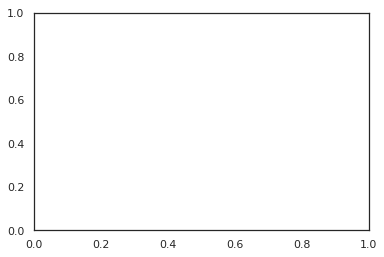

In [28]:
# visualization
fig = plt.figure()
ax = plt.axes()
##TODO

## 3.1 train a parametric model 

#### Benefits of Parametric Machine Learning Algorithms:

Simpler: These methods are easier to understand and interpret results.
Speed: Parametric models are very fast to learn from data.
Less Data: They do not require as much training data and can work well even if the fit to the data is not perfect.
Limitations of Parametric Machine Learning Algorithms:

##### Constrained: By choosing a functional form these methods are highly constrained to the specified form.
Limited Complexity: The methods are more suited to simpler problems.
Poor Fit: In practice the methods are unlikely to match the underlying mapping function.


### Multi-Variable Linear Regression

statsmodels.regression.linear_model.OLS

In [29]:
# set song_popularity to be predicted value y
# set (acousticness	 danceability	instrumentalness	loudness	audio_valence	playlist) to be X

# Note the difference in argument order
model = sm.OLS(np.asarray(y_train), np.asarray(X_train)).fit()
y_pred = model.predict(np.asarray(X_test)) # make the predictions by the model

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                 1.459e+04
Date:                Fri, 07 Jun 2019   Prob (F-statistic):               0.00
Time:                        15:56:16   Log-Likelihood:                -69099.
No. Observations:               15068   AIC:                         1.382e+05
Df Residuals:                   15063   BIC:                         1.382e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.8115      0.817      2.217      0.027       0.210       3.413
x2            68.1953      0.881     77.443      0.000      66.469      69.921
x3           -11.7766      0.963    -12.225      0.000     -13.665      -9.888
x4            -1.1098      0.060    -18.649      0.000      -1.226      -0.993
x5             0.1552      0.825      0.188      0.851      -1.462       1.773
==============================================================================
Omnibus:                      493.975   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              537.670
Skew:                          -0.456   Prob(JB):                    1.76e-117
Kurtosis:                       2.843   Cond. No.                         49.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
#print('params', model.params)
print('tvalues',model.tvalues)

print("The model is:","\n song_popularity = ", model.params[0],"*acousticness","\n",
     model.params[1],"*danceability",model.params[2],"*instrumentalness","\n",
      model.params[3],"*loudness",model.params[4],"*audio_valence")

tvalues [  2.21732934  77.44280759 -12.22508949 -18.64874014   0.18810048]
The model is: 
 song_popularity =  1.81148439167 *acousticness 
 68.1952940263 *danceability -11.7765883546 *instrumentalness 
 -1.10981022039 *loudness 0.155216755204 *audio_valence


In [32]:
#visualize the result 
df_reg = pd.DataFrame( y_test.values, columns = ['actual_song_popularity'], index=y_test.index)
df_reg['predict_song_popularity'] = y_pred
df_reg

,actual_song_popularity,predict_song_popularity
song_name,,
Lean Wit Me,89,51.582256
Otro Día Sera (Desencontrandonos),37,55.363922
Honors - Radio Mix,41,38.052522
Alabam,32,62.666023
Laid,57,39.027587
The Beginning (Work It Out),43,31.668535
At My Front Door,37,51.800531
War Is Hell - Re-Recorded,37,57.839261
The Weekend (feat. Young Thug & Swizz Beatz),66,45.753595


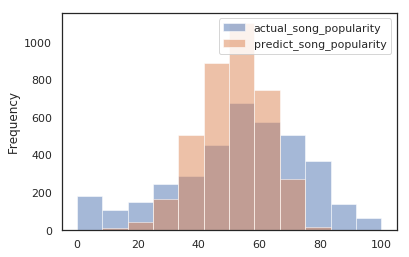

In [33]:
# to view the distribution difference
ax = df_reg.plot.hist(bins=12, alpha=0.5)

In [34]:
# evaluate the test loss
def 
y_test.values



SyntaxError: invalid syntax (<ipython-input-34-4f8092649286>, line 2)

### Naive Bayes

In [ ]:
#TODO
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_test)

## 3.2 train a non-parametic model: 

#### Benefits of Nonparametric Machine Learning Algorithms:

  Flexibility: Capable of fitting a large number of functional forms. 

  Power: No assumptions (or weak assumptions) about the underlying function. 

  Performance: Can result in higher performance models for prediction. 

#### Limitations of Nonparametric Machine Learning Algorithms:

More data: Require a lot more training data to estimate the mapping function.
Slower: A lot slower to train as they often have far more parameters to train.
Overfitting: More of a risk to overfit the training data and it is harder to explain why specific predictions are made.

### K-NN

###  Decesion tree 

In [ ]:
df.head()

### SVM

### Classification
We now want to convert the problem to a classification problem, by clustering the popularity to 10 different levels. 

In [ ]:
#sort all Y data into 10 classification from 1-10


# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [ ]:
# analyze 15 features, relevance


In [ ]:
# model training, multi regression


In [ ]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

# Ethics & Privacy

We took our data from kaggle.com, which is a public database made specifically for data science work. We’ve only used and analyzed retrieved from the site, so permissions of use and privacy concerns have already been filtered by the site prior to use.

Because we took our data from the site, there are limitations to our analysis that stem from this. For instance, we can only analyze and use the song features that were listed in the song. However, by carefully choosing features that best characterize songs, we can still derive a close approximation. Another bias we should be mindful of in our analysis is that certain songs may be more similar to another because they are of the same genre. In this case, finding more salient features of the song such as tempo to be similar would be redundant. We can mitigate this issue, however, by also analyzing other features of the song that are not homogeneous across those of the same genre.

Additionally, although the usage of data may not have been an issue, we should still be considerate of the potential issues with distribution of the conclusions drawn from the data. For instance, that this information won’t result in an abusive inclusion of the features in hopes of gaining more popularity in a song. Although we, personally, may not use it for unethical marketing purposes, we should still try to ensure that such a thing may not happen.


# Conclusion & Discussion

*Fill in your discussion information here*

Q1. Do popular songs have similar attributes?

Q2. If popular songs do have similar attributes, can we predict what song will be the next “hit”?


## reference: 
http://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example

https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

https://machinelearningmastery.com/parametric-and-nonparametric-machine-learning-algorithms/

